In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [4]:
#khởi tạo Model
lm = LinearRegression()
lm

LinearRegression()

In [5]:
#Chuẩn bị dữ liệu
X = df[['highway-mpg']]
y = df['price']

In [6]:
# trainning model
lm.fit(X, y)

LinearRegression()

In [7]:
# Kiểm tra model
yhat = lm.predict(X)

In [8]:
y[0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [9]:
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
a = lm.intercept_
a

38423.3058581574

In [11]:
b = lm.coef_[0]

In [12]:
#price = 38423.31 - 821.73 x highway-mpg

## Multiple Linear Regression

In [13]:
# horsepower, curb-weight, engine-size,highway-mpg
lm1 = LinearRegression()

In [14]:
X1 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y1 = df['price']

In [15]:
lm1.fit(X1, y1)

LinearRegression()

In [16]:
yhat1 = lm1.predict(X1)

In [17]:
yhat1[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [18]:
a = lm1.intercept_
a

-15806.62462632923

In [19]:
b = lm1.coef_
b

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [20]:
#price = -15806.62 + 53.496 x horsepower +  4.708 x curb-weight + 81.530 x engine-size + 36.057 x highway-mpg

## Evaluation

## Simple Linear

### Regression plot

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

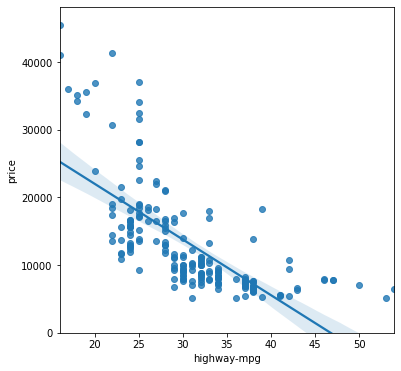

In [22]:
plt.figure(figsize=(6,6))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.show()

### Residual plot

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


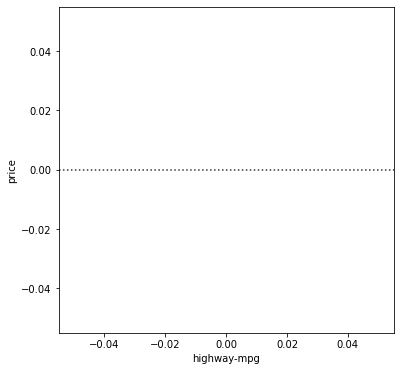

In [23]:
plt.figure(figsize=(6,6))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

## Multiple Linear

### Distribution plot

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


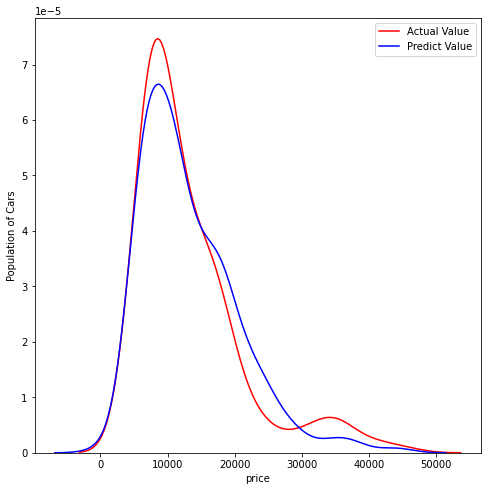

In [25]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Value')
sns.distplot(yhat1, hist=False, color='b', label='Predict Value', ax=ax1)
plt.ylabel('Population of Cars')
plt.legend()

plt.show()